In [4]:
import Locate_Ice_Mosaic
from Locate_Ice_Mosaic import M3_Mosaic
from os import path as path
import os
import tifffile as tf

ice_pipe_folder = 'D:/Data/Ice_Pipeline_Out_6-2-23'
smooth_folder = path.join(ice_pipe_folder,'rfl_smooth')

in_dict = {}
prog,tot = 1,len(os.listdir(smooth_folder))
for file in os.listdir(smooth_folder):
    im = tf.imread(path.join(smooth_folder,file))
    in_dict.update({file[:-4]:im})
    print (f'\r{prog} of {tot} ({prog/tot:.1%})',end='\r')
    prog+=1

In [100]:
from importlib import reload
reload(Locate_Ice_Mosaic)
from Locate_Ice_Mosaic import M3_Mosaic


def load_tifs(pathList:list)->list:
    tif_list = []
    prog,tot = 1,len(pathList)
    for path in pathList:
        tif_list.append(tf.imread(path))
        print (f'\r{prog} of {tot} retrived. ({prog/tot:.0%})',end='\r')
        prog+=1
    return tif_list

print ('Select Analysis Folder:')
folderPath = 'D:/Data/Ice_Pipeline_Out_6-8-23'
all_rfl_paths = [os.path.join(folderPath,'rfl_cropped',i) for i in os.listdir(os.path.join(folderPath,'rfl_cropped'))]
all_loc_paths = [os.path.join(folderPath,'loc_cropped',i) for i in os.listdir(os.path.join(folderPath,'loc_cropped'))]
all_obs_paths = [os.path.join(folderPath,'obs_cropped',i) for i in os.listdir(os.path.join(folderPath,'obs_cropped'))]

with open(os.path.join(folderPath,'stampNames.txt')) as f:
    all_names = f.readlines()
all_names = [i[:-2] for i in all_names]

def batch_list(input:list,n:int)->list:
    return [input[i:i+n] for i in range(0,len(input),n)]


N = 5
batch_rfl_paths = batch_list(all_rfl_paths,N)
batch_loc_paths = batch_list(all_loc_paths,N)
batch_obs_paths = batch_list(all_obs_paths,N)
all_names_split = batch_list(all_names,N)
batch_keys = batch_list(tuple(in_dict.keys()),N)
batch_vals = batch_list(tuple(in_dict.values()),N)


prog,tot=0,len(all_rfl_paths)
for n in range(len(batch_rfl_paths)):
    print ('Retrieving RFL Tifs...')
    batch_rfl = load_tifs(batch_rfl_paths[n])
    print ('\nRetrieving LOC Tifs...')
    batch_loc = load_tifs(batch_loc_paths[n])
    print ('\nRetrieving OBS Tifs...')
    batch_obs = load_tifs(batch_obs_paths[n])
    batch_names = all_names_split[n]

    batch_dict = {key:val for key,val in zip(batch_keys[n],batch_vals[n])}
    print(batch_dict.keys())

    batchMosaic = M3_Mosaic(batch_rfl,batch_loc,batch_obs,batch_names,folderPath)
    prog = prog+len(batchMosaic.stampNames)
    print (f'\n-----Beginning Mosaic analysis of {len(batchMosaic.stampNames)} ({prog} of {tot})images-----')
    print ('locating ice...')
    allband_array = batchMosaic.locate_ice(inputImageDictionary=batch_dict)

    print ('\nRemoval from memory...')
    del batch_rfl,batch_loc,batch_obs

Select Analysis Folder:
Retrieving RFL Tifs...
5 of 5 retrived. (100%)
Retrieving LOC Tifs...
5 of 5 retrived. (100%)
Retrieving OBS Tifs...
dict_keys(['20090520t065048_smooth', '20090528t083319_smooth', '20090529t013507_smooth', '20090529t100749_smooth', '20090529t183825_smooth'])

-----Beginning Mosaic analysis of 5 (5 of 99)images-----
locating ice...
>>>Ice located in 22.7 seconds

Removal from memory...
Retrieving RFL Tifs...
5 of 5 retrived. (100%)
Retrieving LOC Tifs...
5 of 5 retrived. (100%)
Retrieving OBS Tifs...
dict_keys(['20090530t030925_smooth', '20090530t201123_smooth', '20090531t172712_smooth', '20090601t061442_smooth', '20090602t074711_smooth'])

-----Beginning Mosaic analysis of 5 (10 of 99)images-----
locating ice...
>>>Ice located in 15.5 seconds

Removal from memory...
Retrieving RFL Tifs...
5 of 5 retrived. (100%)
Retrieving LOC Tifs...
5 of 5 retrived. (100%)
Retrieving OBS Tifs...
dict_keys(['20090602t203342_smooth', '20090603t050442_smooth', '20090603t174502_sm

In [7]:
import os
from os import path as path
mypath = 'D:/Data/Ice_Pipeline_Out_6-2-23/spectral_angle_maps'
file_list = [i for i in os.listdir(mypath) if path.isfile(path.join(mypath,i))==True]
file_list

['20090520t065048_SAM.tif',
 '20090528t083319_SAM.tif',
 '20090529t013507_SAM.tif',
 '20090529t100749_SAM.tif',
 '20090529t183825_SAM.tif',
 '20090530t030925_SAM.tif',
 '20090530t201123_SAM.tif',
 '20090531t172712_SAM.tif',
 '20090601t061442_SAM.tif',
 '20090602t074711_SAM.tif',
 '20090602t203342_SAM.tif',
 '20090603t050442_SAM.tif',
 '20090603t174502_SAM.tif',
 '20090604t104552_SAM.tif',
 '20090604t191631_SAM.tif',
 '20090605t034701_SAM.tif',
 '20090605t163232_SAM.tif',
 '20090605t163636_SAM.tif',
 '20090606t010302_SAM.tif',
 '20090606t093322_SAM.tif',
 '20090607t110414_SAM.tif',
 '20090607t193433_SAM.tif',
 '20090608t040423_SAM.tif',
 '20090608t123433_SAM.tif',
 '20090609t095022_SAM.tif',
 '20090609t223544_SAM.tif',
 '20090610t070604_SAM.tif',
 '20090610t153615_SAM.tif',
 '20090610t154042_SAM.tif',
 '20090611t000633_SAM.tif',
 '20090611t083653_SAM.tif',
 '20090612t100753_SAM.tif',
 '20090612t183813_SAM.tif',
 '20090613t030843_SAM.tif',
 '20090613t113913_SAM.tif',
 '20090613t200943_SA

(3585, 304, 59)


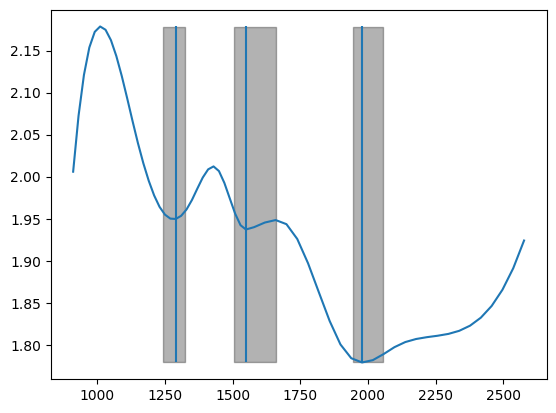

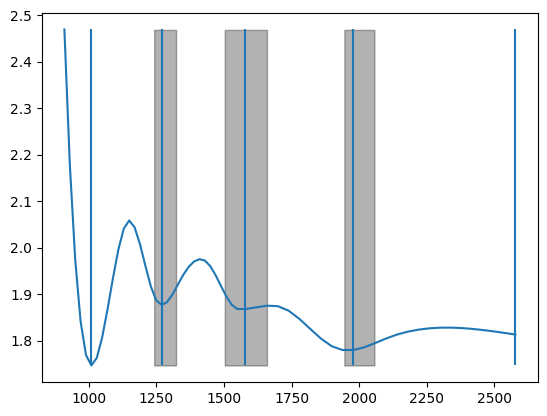

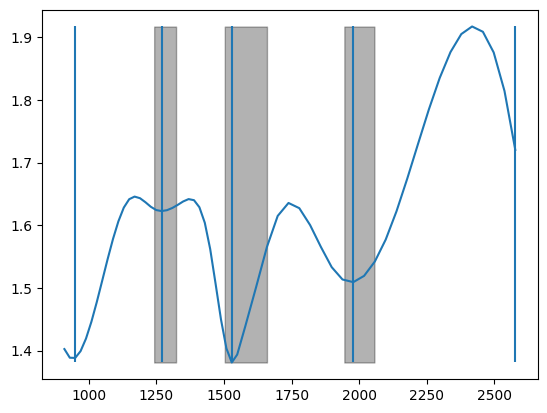

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print (allband_array.shape)
df = pd.read_csv('D:/Data/Ice_Pipeline_Out_6-2-23/bandInfo.csv')
wvl = df.iloc[:,2]
def plot_stuff(x,y):
    fig = plt.figure()
    test_spec = list(in_dict.values())[0][x,y,:]
    plt.plot(wvl,test_spec)
    plt.vlines(wvl[np.where(allband_array[x,y,:]==1)[0]],test_spec.min(),test_spec.max())
    plt.fill_betweenx(np.arange(test_spec.min(),test_spec.max(),0.001),1242,1323,color='k',alpha=0.3)
    plt.fill_betweenx(np.arange(test_spec.min(),test_spec.max(),0.001),1503,1659,color='k',alpha=0.3)
    plt.fill_betweenx(np.arange(test_spec.min(),test_spec.max(),0.001),1945,2056,color='k',alpha=0.3)
plot_stuff(0,98)
plot_stuff(0,101)
plot_stuff(3244,150)


44.855213019448456
45.507950938676636
45.507950938676636
44.855213019448456
43.236967102436815
43.989820821554176
43.989820821554176
40.87756225798143
50.25947602832627
50.25947602832627
40.87756225798143
43.989820821554176
43.179859392671574
49.27017355999539
43.78279355686042
50.25947602832627


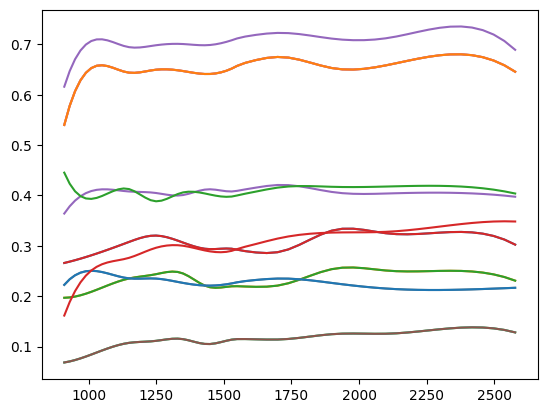

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from get_USGS_H2OFrost import get_USGS_H2OFrost
import numpy as np
df = pd.read_csv('D:/Data/Ice_Pipeline_Out_6-2-23/sample_spectra.csv')
wvl_df = pd.read_csv('D:/Data/Ice_Pipeline_Out_6-2-23/bandInfo.csv')
wvl = wvl_df.iloc[:,2]
_wvl,M = get_USGS_H2OFrost('D:/Data/USGS_Water_Ice')
for i in df.columns[1:]:
    I = np.array(df[i])
    plt.plot(wvl,I)
    #print (np.dot(I,M)/(np.linalg.norm(M)*np.linalg.norm(I)))
    print (180*(np.arccos(np.dot(df[i],M)/(np.linalg.norm(M)*np.linalg.norm(df[i])))/np.pi))

173, (0.02%)
(173, 59)


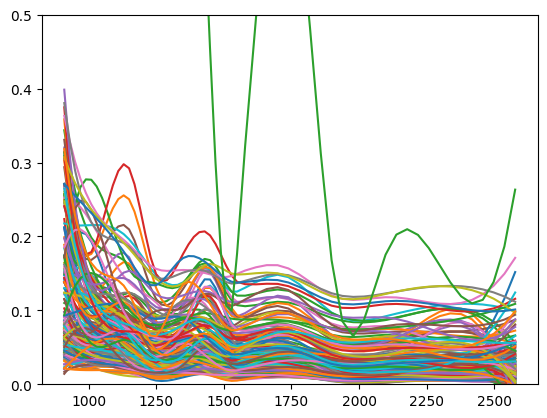

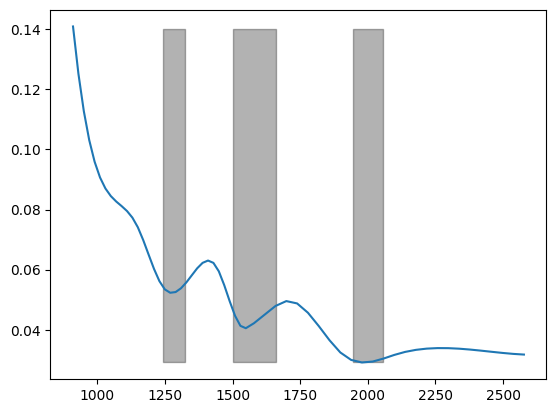

In [40]:
import tifffile as tf
smooth_im = tf.imread('D:/Data/Ice_Pipeline_Out_6-2-23/rfl_smooth/20090529t183825_smooth.tif')
df = pd.read_csv('D:/Data/Ice_Pipeline_Out_6-2-23/detection_latlong.csv')
x,y = df['x'],df['y']
wvl_df = pd.read_csv('D:/Data/Ice_Pipeline_Out_6-2-23/bandInfo.csv')
wvl = wvl_df.iloc[:,2]
_wvl,M = get_USGS_H2OFrost('D:/Data/USGS_Water_Ice')

avg_arr = np.zeros((0,59))

num = 0
for i,j in zip(x,y):
    I = smooth_im[i,j,:]
    plt.plot(wvl,I)
    #print (180*(np.arccos(np.dot(I,M)/(np.linalg.norm(M)*np.linalg.norm(I)))/np.pi))
    avg_arr = np.concatenate([avg_arr,I[np.newaxis,:]])
    num+=1
plt.ylim(0,0.5)
print (f'{num}, ({num/smooth_im[:,:,0].size:.2%})')
print (avg_arr.shape)
fig = plt.figure()
avg = np.mean(avg_arr,axis=0)
plt.plot(wvl,avg)
plt.fill_betweenx(np.arange(avg.min(),avg.max(),0.001),1242,1323,color='k',alpha=0.3)
plt.fill_betweenx(np.arange(avg.min(),avg.max(),0.001),1503,1659,color='k',alpha=0.3)
plt.fill_betweenx(np.arange(avg.min(),avg.max(),0.001),1945,2056,color='k',alpha=0.3)

(3333, 304, 2)
[[ 134676.5 -104529.2]
 [ 139184.5  -94104.5]
 [ 139466.2  -94668. ]
 [ 139748.   -92414. ]
 [ 140029.8  -92977.5]
 [ 140875.   -94104.5]
 [ 160034.  -171867.5]
 [ 199760.8 -207931.5]
 [ 202296.5 -203423.5]
 [ 204550.5 -212157.8]
 [ 207368.  -197506.8]]
2972 124 (3333, 304, 59)
2994 83 (3333, 304, 59)
2990 84 (3333, 304, 59)
2998 77 (3333, 304, 59)
2994 78 (3333, 304, 59)
2985 79 (3333, 304, 59)
2541 256 (3333, 304, 59)
2178 262 (3333, 304, 59)
2187 243 (3333, 304, 59)
2134 263 (3333, 304, 59)
2188 214 (3333, 304, 59)


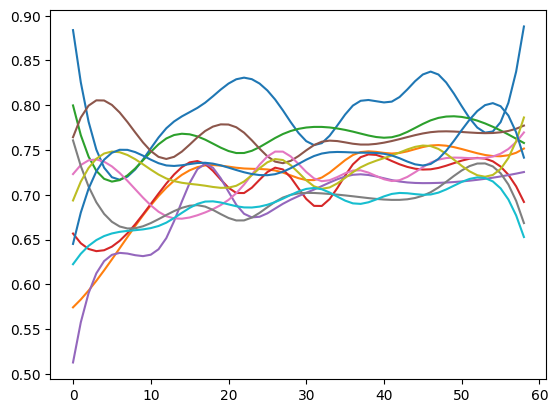

In [119]:
def stereo_project(lat:np.ndarray,long:np.ndarray)->np.ndarray:
    return np.array((2*1737400*np.tan(np.pi/4-np.pi*abs(lat/360))*np.sin(np.pi*long/180),\
            2*1737400*np.tan(np.pi/4-np.pi*abs(lat/360))*np.cos(np.pi*long/180)))
def stereo_project_float(lat:float,long:float)->tuple:
    return (2*1737400*np.tan(np.pi/4-np.pi*abs(lat/360))*np.sin(np.pi*long/180),\
            2*1737400*np.tan(np.pi/4-np.pi*abs(lat/360))*np.cos(np.pi*long/180))

smooth_im_backplane = tf.imread('D:/Data/Ice_Pipeline_Out_6-2-23/loc_cropped/m3g20090529t183825_loc_cropped.tif')
backplane_projected = np.moveaxis(stereo_project(smooth_im_backplane[:,:,1],smooth_im_backplane[:,:,0]),0,2)
print (backplane_projected.shape)

x_max,x_min,y_max,y_min = (backplane_projected[:,:,0].max(),backplane_projected[:,:,0].min(),backplane_projected[:,:,1].max(),backplane_projected[:,:,1].min())

with open('D:/Data/SP_IceLoc_280m.txt','r') as f:
    li_locations = f.readlines()
li_locations = [i[:-1] for i in li_locations]
li_locations = [i.split('\t') for i in li_locations]
li_locations = np.array(li_locations).astype(float)
li_locations_test = li_locations[np.where((li_locations[:,0]>x_min)&(li_locations[:,0]<x_max)&(li_locations[:,1]>y_min)&(li_locations[:,1]<y_max))]
print (li_locations_test)
fig = plt.figure()


prog,tot = 1,len(tuple(li_locations_test.T)[0])
mapped_coord_array = np.zeros((0,2))
for x,y in zip(*tuple(li_locations_test.T)):
    idx = (np.abs(backplane_projected[:,:,0]-x)+np.abs(backplane_projected[:,:,1]-y)).argmin()
    x_close,y_close = backplane_projected[:,:,0].flatten()[idx],backplane_projected[:,:,1].flatten()[idx]
    mapped_coord_array = np.concatenate([mapped_coord_array,np.array((x_close,y_close))[np.newaxis,:]])

for x,y in zip(mapped_coord_array[:,0],mapped_coord_array[:,1]):
    x_np,y_np = (np.where((backplane_projected[:,:,0]==x)&(backplane_projected[:,:,1]==y)))
    print (x_np[0],y_np[0],smooth_im.shape)
    plt.plot(smooth_im[x_np[0],y_np[0],:])


ORIG_MAX: 3.5693740844726562
ORIG_MIN: -0.11931402236223221

OBS_MAX: 164.74740600585938
OBS_MIN:26.795948028564453


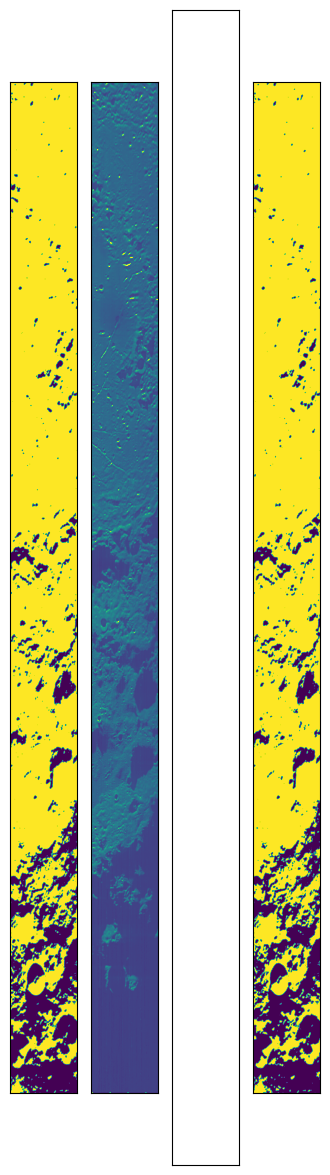

In [41]:
import os
import tifffile as tf
import numpy as np
import matplotlib.pyplot as plt

obs_im = tf.imread('D:/Data/Ice_Pipeline_Out_6-2-23/obs_cropped/m3g20090529t013507_obs_cropped.tif')
obs_im[:,:,-1] = 180*np.arccos(obs_im[:,:,-1])/np.pi
x,y = (np.where(obs_im[:,:,-1]>90))
bool_obs = np.ones((obs_im.shape[:2]))
bool_obs[x,y] = 0
og_im = tf.imread('D:/Data/Ice_Pipeline_Out_6-2-23/rfl_cropped/m3g20090529t013507_rfl_cropped.tif')

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(4,15))
ax1.set_yticks([]),ax2.set_yticks([]),ax3.set_yticks([]),ax4.set_yticks([])
ax1.set_xticks([]),ax2.set_xticks([]),ax3.set_xticks([]),ax4.set_xticks([])
ax1.imshow(bool_obs)
ax2.imshow(og_im[:,:,0],vmax=0.5)

print (f'ORIG_MAX: {og_im[:,:,0].max()}\nORIG_MIN: {og_im[:,:,0].min()}\n')
print (f'OBS_MAX: {obs_im[:,:,-1].max()}\nOBS_MIN:{obs_im[:,:,-1].min()}')

bool_compare = tf.imread('D:/Data/Ice_Pipeline_Out_6-2-23/incidence_bright_bool_arrays/20090529t013507_inc_bright.tif')
ax3.plot()
ax4.imshow(bool_compare)

4.0 2.0


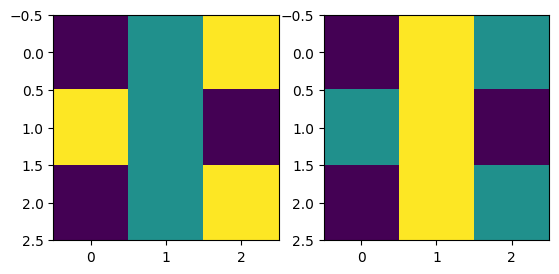

In [59]:
myarr = np.array([(1,2,3),(3,2,1),(1,2,3)])
fig,axList = plt.subplots(1,2)
axList[0].imshow(myarr)

newarr = np.zeros(myarr.shape)
newarr[np.where(myarr!=3)] = myarr[np.where(myarr!=3)]*2
newarr[np.where(myarr==3)] = myarr[np.where(myarr==3)]
axList[1].imshow(newarr)

print (newarr.max(),newarr.min())
